
    ╔════════════════════════════════════════════════════════════════╗
    ║                                                                ║
    ║         NAIVE BAYES CLASSIFIER - DATA ANALYTICS TOOL           ║
    ║                                                                ║
    ║  Complete workflow implementation dengan Google Colab          ║
    ║  Upload, Preprocessing, Training, Evaluation & Visualization   ║
    ║                                                                ║
    ╚════════════════════════════════════════════════════════════════╝
    
UPLOAD DATASET
Silakan pilih file CSV Anda...


Saving demand_forecasting_dataset .csv to demand_forecasting_dataset  (1).csv

✓ File 'demand_forecasting_dataset  (1).csv' berhasil diupload!
INFORMASI DATASET
Jumlah baris (rows):    4921
Jumlah kolom (columns): 10
Ukuran dataset:         (4921, 10)

PREVIEW DATA (5 Baris Pertama)
         date  product_id  category_id  store_id  historical_sales  price  \
0  2022-01-02        1043            4         9                16  48.29   
1  2022-01-02        1012            4         2                25  44.01   
2  2022-01-03        1003            5         4                26   9.44   
3  2022-01-03        1005            4         1                23   5.42   
4  2022-01-04        1011            1         5                12  21.86   

   promotion_flag  holiday_flag  economic_index  target_demand  
0               0             0           84.07              8  
1               0             0          106.87             22  
2               1             0          104.98           

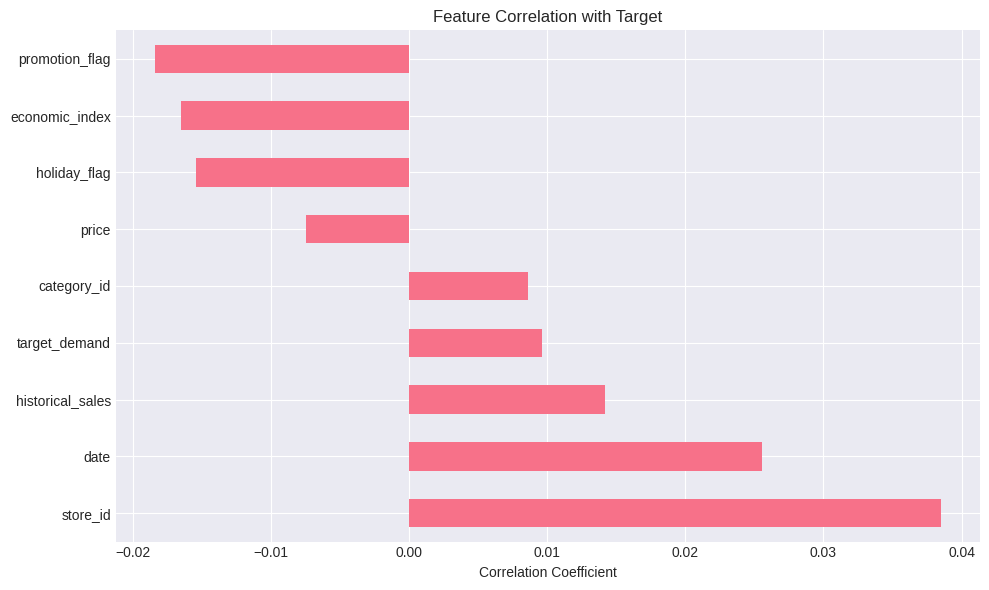


✓ Preprocessing selesai!
  Final shape - X: (4921, 9), y: (4921,)

Masukkan proporsi test size (default 0.2): 0.2

[TAHAP 3] SPLITTING DATASET (TRAIN-TEST SPLIT)

✓ Dataset split berhasil!
  Training set:   3936 samples (80%)
  Testing set:    985 samples (20%)
  Features:       9 features
  Random state:   42

Distribusi kelas:
  Training:  [ 0  0  0 ... 81 81 70]
  Testing:   [ 0  0  0 ... 20 21 17]

[TAHAP 4] TRAINING NAIVE BAYES MODEL

Model: Gaussian Naive Bayes
Formula: P(x_i|C) = (1/√(2πσ²)) * e^(-(x_i-μ)²/(2σ²))

Training model...
✓ Training selesai!

Model Parameters:
  Classes: [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049]
  Number of classes: 50
  Class priors: [0.01829268 0.02235772 0.01880081 0.01880081 0.01778455 0.01981707
 0.0203252  0.01778455 0.02083333 0.020325

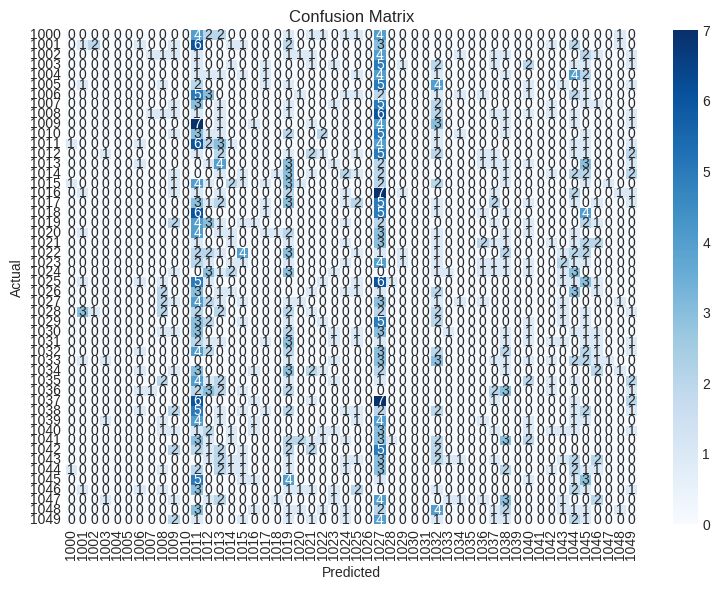


[6.2] CLASSIFICATION REPORT
----------------------------------------------------------------------
              precision    recall  f1-score   support

  Class 1000       0.00      0.00      0.00        18
  Class 1001       0.10      0.05      0.06        22
  Class 1002       0.00      0.00      0.00        18
  Class 1003       0.00      0.00      0.00        19
  Class 1004       0.00      0.00      0.00        18
  Class 1005       0.00      0.00      0.00        19
  Class 1006       0.00      0.00      0.00        20
  Class 1007       0.00      0.00      0.00        17
  Class 1008       0.06      0.05      0.05        20
  Class 1009       0.00      0.00      0.00        20
  Class 1010       0.00      0.00      0.00        19
  Class 1011       0.04      0.27      0.07        22
  Class 1012       0.00      0.00      0.00        22
  Class 1013       0.09      0.20      0.13        20
  Class 1014       0.00      0.00      0.00        21
  Class 1015       0.05      0.05  

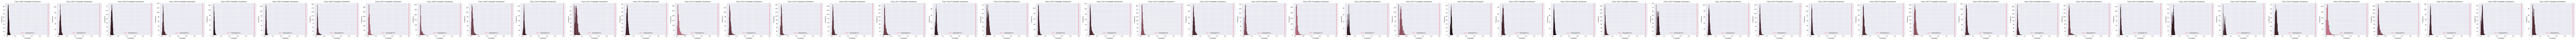


[7.2] CHECKING FEATURE DISTRIBUTIONS
----------------------------------------------------------------------


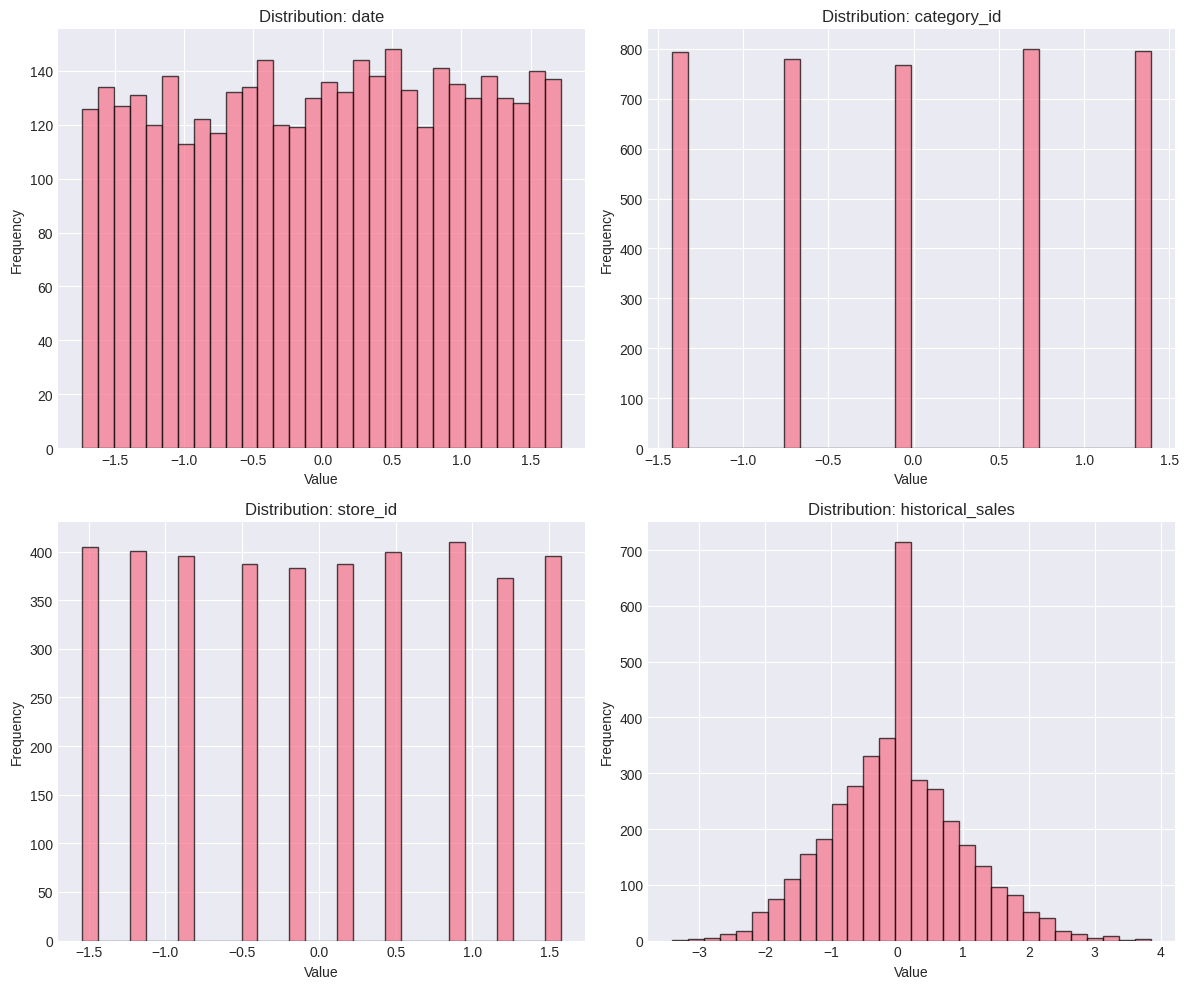


[7.3] ROC CURVE DAN AUC
----------------------------------------------------------------------


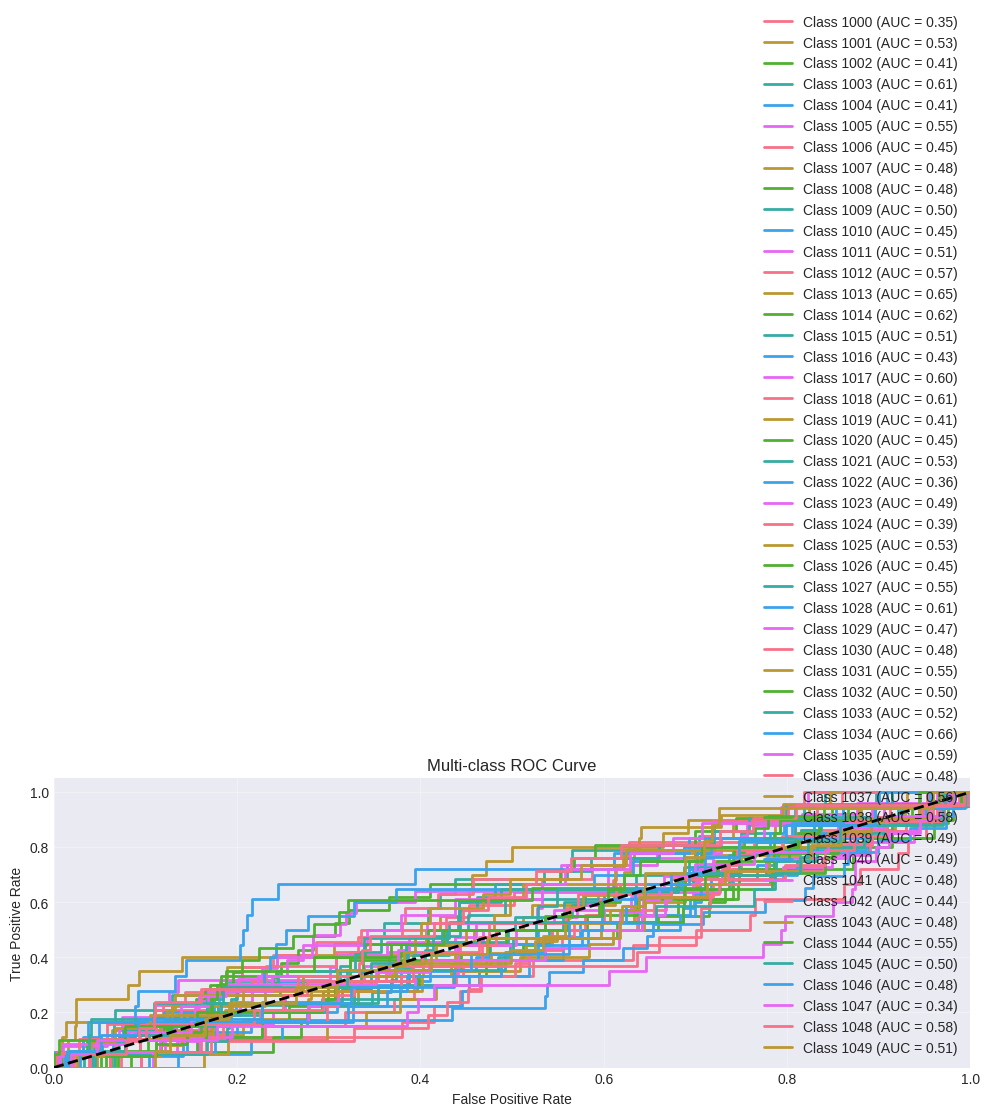


[7.4] LEARNING CURVE
----------------------------------------------------------------------


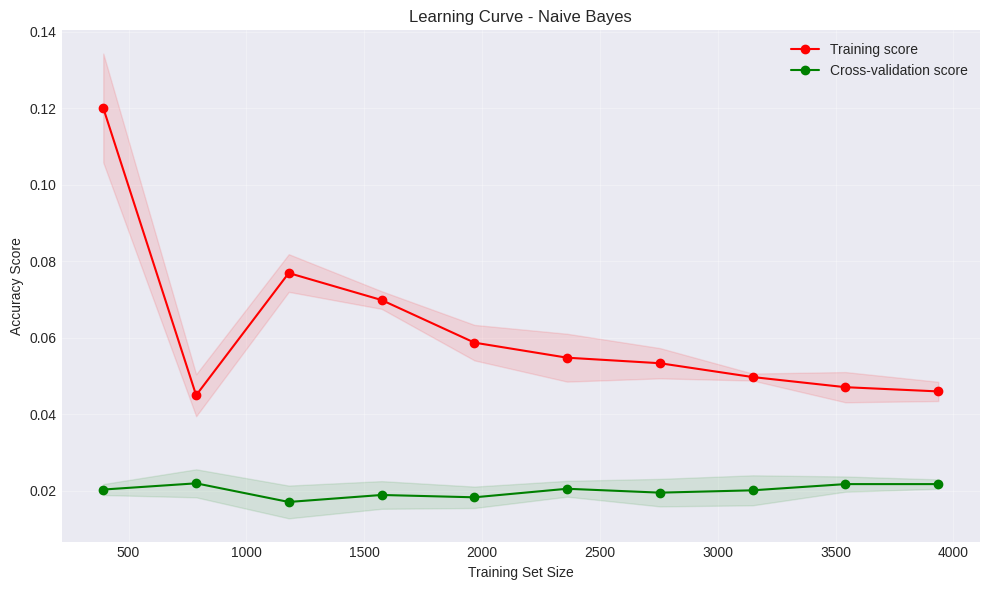

✓ Semua visualisasi selesai!

[TAHAP 8] LAPORAN AKHIR DAN INTERPRETASI

📊 RINGKASAN PERFORMA MODEL
----------------------------------------------------------------------
Model:              Gaussian Naive Bayes
Dataset Size:       4921 samples
Features:           9 features
Classes:            50 classes
Training Samples:   3936
Testing Samples:    985

Accuracy:           0.0294 (2.94%)
Precision:          0.0216 (2.16%)
Recall:             0.0294 (2.94%)
F1-Score:           0.0198 (1.98%)

✅ KELEBIHAN NAIVE BAYES
----------------------------------------------------------------------
• Cepat dan efisien untuk dataset besar
• Efektif untuk klasifikasi multi-class
• Membutuhkan data training yang relatif sedikit
• Tidak sensitif terhadap irrelevant features
• Memberikan output probabilistik

⚠️ KETERBATASAN NAIVE BAYES
----------------------------------------------------------------------
• Asumsi independensi antar features (jarang terpenuhi di real-world)
• Masalah zero-frequency untu

In [ ]:
# ===================================================================
# IMPLEMENTASI NAIVE BAYES CLASSIFIER - COMPLETE WORKFLOW
# ===================================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, classification_report,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_curve, auc, roc_auc_score)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===================================================================
# CLASS NAIVE BAYES ANALYZER
# ===================================================================

class NaiveBayesAnalyzer:
    def __init__(self):
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.predictions = None
        self.probabilities = None
        self.scaler = None
        self.label_encoders = {}

    # ===================================================================
    # TAHAP 1: UPLOAD DAN PERSIAPAN DATA
    # ===================================================================

    def upload_and_load_data(self):
        """
        Upload CSV file from Google Colab and load dataset
        Target column WAJIB ditentukan karena Naive Bayes adalah Supervised Learning
        """
        from google.colab import files
        import io

        # Upload file
        print("=" * 70)
        print("UPLOAD DATASET")
        print("=" * 70)
        print("Silakan pilih file CSV Anda...")
        uploaded = files.upload()

        # Read uploaded file
        file_name = list(uploaded.keys())[0]
        self.data = pd.read_csv(io.BytesIO(uploaded[file_name]))

        # Dataset information
        print(f"\n✓ File '{file_name}' berhasil diupload!")
        print("=" * 70)
        print("INFORMASI DATASET")
        print("=" * 70)
        print(f"Jumlah baris (rows):    {len(self.data)}")
        print(f"Jumlah kolom (columns): {len(self.data.columns)}")
        print(f"Ukuran dataset:         {self.data.shape}")

        # Display first 5 rows
        print("\n" + "=" * 70)
        print("PREVIEW DATA (5 Baris Pertama)")
        print("=" * 70)
        print(self.data.head())

        # Data types info
        print("\n" + "=" * 70)
        print("TIPE DATA KOLOM")
        print("=" * 70)
        print(self.data.dtypes)

        # Check missing values
        print("\n" + "=" * 70)
        print("MISSING VALUES CHECK")
        print("=" * 70)
        missing = self.data.isnull().sum()
        if missing.sum() == 0:
            print("✓ Tidak ada missing values!")
        else:
            print("Missing values per kolom:")
            print(missing[missing > 0])
            print(f"\nTotal missing values: {missing.sum()}")

        # Statistical summary
        print("\n" + "=" * 70)
        print("STATISTIK DESKRIPTIF")
        print("=" * 70)
        print(self.data.describe())

        return self.data

    # ===================================================================
    # TAHAP 2: DATA PREPROCESSING
    # ===================================================================

    def preprocess_data(self, target_column):
        """
        Comprehensive data preprocessing

        Parameters:
        -----------
        target_column : str
            Nama kolom target/label
        """
        print("\n" + "=" * 70)
        print("[TAHAP 2] DATA PREPROCESSING")
        print("=" * 70)

        # Validasi target column
        if target_column not in self.data.columns:
            raise ValueError(f"Kolom '{target_column}' tidak ditemukan dalam dataset!")

        # Pisahkan features dan target
        X = self.data.drop(columns=[target_column])
        y = self.data[target_column]

        # 2.1 Handling Missing Values
        print("\n[2.1] HANDLING MISSING VALUES")
        print("-" * 70)

        missing_count = X.isnull().sum().sum()
        print(f"Total missing values di features: {missing_count}")

        if missing_count > 0:
            # Pisahkan kolom numerik dan kategorikal
            numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
            categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

            # Impute numeric features dengan mean
            if numeric_cols:
                imputer_numeric = SimpleImputer(strategy='mean')
                X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])
                print(f"✓ Numeric columns imputed dengan mean: {len(numeric_cols)} kolom")

            # Impute categorical features dengan most frequent
            if categorical_cols:
                imputer_categorical = SimpleImputer(strategy='most_frequent')
                X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])
                print(f"✓ Categorical columns imputed dengan most_frequent: {len(categorical_cols)} kolom")
        else:
            print("✓ Tidak ada missing values!")

        # 2.2 Encoding Categorical Features
        print("\n[2.2] ENCODING CATEGORICAL FEATURES")
        print("-" * 70)

        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        if categorical_cols:
            print(f"Categorical columns ditemukan: {categorical_cols}")

            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le
                print(f"✓ {col}: {len(le.classes_)} unique values encoded")
        else:
            print("✓ Tidak ada categorical columns")

        # Encode target jika kategorikal
        if y.dtype == 'object' or y.dtype.name == 'category':
            le_target = LabelEncoder()
            y = le_target.fit_transform(y)
            self.label_encoders['target'] = le_target
            print(f"\n✓ Target column encoded: {len(le_target.classes_)} classes")
            print(f"  Classes: {le_target.classes_}")

        # 2.3 Normalisasi Data
        print("\n[2.3] NORMALISASI DATA")
        print("-" * 70)

        self.scaler = StandardScaler()
        X_normalized = self.scaler.fit_transform(X)
        X = pd.DataFrame(X_normalized, columns=X.columns)

        print("✓ Data dinormalisasi menggunakan StandardScaler")
        print(f"  Mean: ~0, Std: ~1")

        # 2.4 Feature Selection (Optional - tampilkan korelasi)
        print("\n[2.4] FEATURE ANALYSIS")
        print("-" * 70)

        # Korelasi dengan target
        correlation_df = pd.DataFrame(X)
        correlation_df['target'] = y
        correlations = correlation_df.corr()['target'].drop('target').sort_values(ascending=False)

        print("Korelasi features dengan target:")
        print(correlations)

        # Visualisasi korelasi
        plt.figure(figsize=(10, 6))
        correlations.plot(kind='barh')
        plt.title('Feature Correlation with Target')
        plt.xlabel('Correlation Coefficient')
        plt.tight_layout()
        plt.show()

        self.X = X
        self.y = y

        print("\n✓ Preprocessing selesai!")
        print(f"  Final shape - X: {X.shape}, y: {y.shape}")

        return X, y

    # ===================================================================
    # TAHAP 3: SPLITTING DATASET
    # ===================================================================

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split dataset menjadi training dan testing set

        Parameters:
        -----------
        test_size : float (default=0.2)
            Proporsi data untuk testing (20%)
        random_state : int (default=42)
            Random seed untuk reproducibility
        """
        print("\n" + "=" * 70)
        print("[TAHAP 3] SPLITTING DATASET (TRAIN-TEST SPLIT)")
        print("=" * 70)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state, stratify=self.y
        )

        print(f"\n✓ Dataset split berhasil!")
        print(f"  Training set:   {self.X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
        print(f"  Testing set:    {self.X_test.shape[0]} samples ({test_size*100:.0f}%)")
        print(f"  Features:       {self.X_train.shape[1]} features")
        print(f"  Random state:   {random_state}")

        # Distribusi kelas di training dan testing
        print("\nDistribusi kelas:")
        print(f"  Training:  {np.bincount(self.y_train)}")
        print(f"  Testing:   {np.bincount(self.y_test)}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    # ===================================================================
    # TAHAP 4: TRAINING MODEL NAIVE BAYES
    # ===================================================================

    def train_model(self):
        """
        Training Gaussian Naive Bayes Classifier
        """
        print("\n" + "=" * 70)
        print("[TAHAP 4] TRAINING NAIVE BAYES MODEL")
        print("=" * 70)

        print("\nModel: Gaussian Naive Bayes")
        print("Formula: P(x_i|C) = (1/√(2πσ²)) * e^(-(x_i-μ)²/(2σ²))")

        # Initialize dan train model
        self.model = GaussianNB()

        print("\nTraining model...")
        self.model.fit(self.X_train, self.y_train)

        print("✓ Training selesai!")

        # Model parameters
        print(f"\nModel Parameters:")
        print(f"  Classes: {self.model.classes_}")
        print(f"  Number of classes: {len(self.model.classes_)}")
        print(f"  Class priors: {self.model.class_prior_}")

        # Training accuracy
        train_score = self.model.score(self.X_train, self.y_train)
        print(f"\n  Training Accuracy: {train_score:.4f} ({train_score*100:.2f}%)")

        return self.model

    # ===================================================================
    # TAHAP 5: PREDIKSI
    # ===================================================================

    def predict(self):
        """
        Predicting on the Test Set
        """
        print("\n" + "=" * 70)
        print("[TAHAP 5] PREDIKSI PADA TEST SET")
        print("=" * 70)

        # Predictions
        self.predictions = self.model.predict(self.X_test)

        # Probabilities
        self.probabilities = self.model.predict_proba(self.X_test)

        print(f"\n✓ Prediksi selesai untuk {len(self.predictions)} samples")
        print(f"  Predicted classes: {np.unique(self.predictions)}")

        # Test accuracy
        test_score = accuracy_score(self.y_test, self.predictions)
        print(f"\n  Test Accuracy: {test_score:.4f} ({test_score*100:.2f}%)")

        # Sample predictions
        print("\nSample Predictions (5 pertama):")
        print("-" * 70)
        results_df = pd.DataFrame({
            'Actual': self.y_test[:5].values,
            'Predicted': self.predictions[:5],
            'Correct': (self.y_test[:5].values == self.predictions[:5])
        })

        for i, class_idx in enumerate(self.model.classes_):
            results_df[f'Prob_Class_{class_idx}'] = self.probabilities[:5, i]

        print(results_df)

        return self.predictions, self.probabilities

    # ===================================================================
    # TAHAP 6: EVALUASI MODEL
    # ===================================================================

    def evaluate_model(self):
        """
        Comprehensive model evaluation
        """
        print("\n" + "=" * 70)
        print("[TAHAP 6] EVALUASI MODEL")
        print("=" * 70)

        # 6.1 Confusion Matrix
        print("\n[6.1] CONFUSION MATRIX")
        print("-" * 70)

        cm = confusion_matrix(self.y_test, self.predictions)
        print("\nConfusion Matrix:")
        print(cm)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.model.classes_,
                    yticklabels=self.model.classes_)
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

        # 6.2 Classification Report
        print("\n[6.2] CLASSIFICATION REPORT")
        print("-" * 70)

        report = classification_report(self.y_test, self.predictions,
                                       target_names=[f"Class {i}" for i in self.model.classes_])
        print(report)

        # 6.3 Metrics Detail
        print("\n[6.3] DETAILED METRICS")
        print("-" * 70)

        accuracy = accuracy_score(self.y_test, self.predictions)

        # Untuk multi-class, gunakan average
        precision = precision_score(self.y_test, self.predictions, average='weighted')
        recall = recall_score(self.y_test, self.predictions, average='weighted')
        f1 = f1_score(self.y_test, self.predictions, average='weighted')

        print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
        print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
        print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

        # 6.4 Cross-Validation
        print("\n[6.4] CROSS-VALIDATION (K-Fold, k=5)")
        print("-" * 70)

        cv_scores = cross_val_score(self.model, self.X, self.y, cv=5)

        print(f"CV Scores: {cv_scores}")
        print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_scores': cv_scores
        }

    # ===================================================================
    # TAHAP 7: VISUALISASI
    # ===================================================================

    def visualize_results(self):
        """
        Comprehensive visualization of results
        """
        print("\n" + "=" * 70)
        print("[TAHAP 7] VISUALISASI HASIL")
        print("=" * 70)

        # 7.1 Predicted Probabilities Distribution
        print("\n[7.1] DISTRIBUSI PROBABILITAS PREDIKSI")
        print("-" * 70)

        n_classes = len(self.model.classes_)
        fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 4))

        if n_classes == 1:
            axes = [axes]

        for i, class_idx in enumerate(self.model.classes_):
            axes[i].hist(self.probabilities[:, i], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Class {class_idx} Probability Distribution')
            axes[i].set_xlabel('Probability')
            axes[i].set_ylabel('Frequency')
            axes[i].axvline(0.5, color='red', linestyle='--', label='Threshold=0.5')
            axes[i].legend()

        plt.tight_layout()
        plt.show()

        # 7.2 Feature Distributions (untuk Gaussian check)
        print("\n[7.2] CHECKING FEATURE DISTRIBUTIONS")
        print("-" * 70)

        n_features = min(4, self.X_train.shape[1])  # Tampilkan max 4 features
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()

        for i in range(n_features):
            feature_name = self.X_train.columns[i]
            axes[i].hist(self.X_train.iloc[:, i], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution: {feature_name}')
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        # 7.3 ROC Curve (untuk binary atau multi-class)
        print("\n[7.3] ROC CURVE DAN AUC")
        print("-" * 70)

        n_classes = len(self.model.classes_)

        if n_classes == 2:
            # Binary classification
            fpr, tpr, _ = roc_curve(self.y_test, self.probabilities[:, 1])
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                    label=f'ROC curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

            # AUC Classification
            print(f"\nAUC Score: {roc_auc:.4f}")
            if roc_auc >= 0.90:
                print("Classification: Excellent (0.90-1.00)")
            elif roc_auc >= 0.80:
                print("Classification: Good (0.80-0.90)")
            elif roc_auc >= 0.70:
                print("Classification: Fair (0.70-0.80)")
            elif roc_auc >= 0.60:
                print("Classification: Poor (0.60-0.70)")
            else:
                print("Classification: Failure (0.50-0.60)")

        else:
            # Multi-class ROC
            from sklearn.preprocessing import label_binarize

            y_test_bin = label_binarize(self.y_test, classes=self.model.classes_)

            plt.figure(figsize=(10, 8))

            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], self.probabilities[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, lw=2,
                        label=f'Class {self.model.classes_[i]} (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Multi-class ROC Curve')
            plt.legend(loc="lower right")
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        # 7.4 Learning Curve
        print("\n[7.4] LEARNING CURVE")
        print("-" * 70)

        train_sizes, train_scores, test_scores = learning_curve(
            self.model, self.X, self.y, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
        plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                         alpha=0.1, color='r')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                         alpha=0.1, color='g')

        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.title('Learning Curve - Naive Bayes')
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("✓ Semua visualisasi selesai!")

    # ===================================================================
    # TAHAP 8: INTERPRETASI DAN KESIMPULAN
    # ===================================================================

    def generate_report(self):
        """
        Generate comprehensive analysis report
        """
        print("\n" + "=" * 70)
        print("[TAHAP 8] LAPORAN AKHIR DAN INTERPRETASI")
        print("=" * 70)

        accuracy = accuracy_score(self.y_test, self.predictions)
        precision = precision_score(self.y_test, self.predictions, average='weighted')
        recall = recall_score(self.y_test, self.predictions, average='weighted')
        f1 = f1_score(self.y_test, self.predictions, average='weighted')

        print("\n📊 RINGKASAN PERFORMA MODEL")
        print("-" * 70)
        print(f"Model:              Gaussian Naive Bayes")
        print(f"Dataset Size:       {len(self.data)} samples")
        print(f"Features:           {self.X.shape[1]} features")
        print(f"Classes:            {len(self.model.classes_)} classes")
        print(f"Training Samples:   {len(self.X_train)}")
        print(f"Testing Samples:    {len(self.X_test)}")
        print()
        print(f"Accuracy:           {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision:          {precision:.4f} ({precision*100:.2f}%)")
        print(f"Recall:             {recall:.4f} ({recall*100:.2f}%)")
        print(f"F1-Score:           {f1:.4f} ({f1*100:.2f}%)")

        print("\n✅ KELEBIHAN NAIVE BAYES")
        print("-" * 70)
        print("• Cepat dan efisien untuk dataset besar")
        print("• Efektif untuk klasifikasi multi-class")
        print("• Membutuhkan data training yang relatif sedikit")
        print("• Tidak sensitif terhadap irrelevant features")
        print("• Memberikan output probabilistik")

        print("\n⚠️ KETERBATASAN NAIVE BAYES")
        print("-" * 70)
        print("• Asumsi independensi antar features (jarang terpenuhi di real-world)")
        print("• Masalah zero-frequency untuk kategori yang tidak muncul di training")
        print("• Estimasi probabilitas kurang reliable untuk dataset kecil")
        print("• Asumsi distribusi Gaussian mungkin tidak cocok untuk semua data")

        print("\n💡 REKOMENDASI")
        print("-" * 70)
        if accuracy >= 0.90:
            print("✓ Model memiliki performa EXCELLENT!")
            print("  Dapat digunakan untuk produksi dengan confidence tinggi")
        elif accuracy >= 0.80:
            print("✓ Model memiliki performa GOOD")
            print("  Layak digunakan, pertimbangkan hyperparameter tuning")
        elif accuracy >= 0.70:
            print("⚠ Model memiliki performa FAIR")
            print("  Pertimbangkan feature engineering atau algoritma lain")
        else:
            print("✗ Model memiliki performa POOR")
            print("  Perlu perbaikan signifikan atau ganti algoritma")

        print("\n" + "=" * 70)
        print("ANALISIS SELESAI!")
        print("=" * 70)


# ===================================================================
# MAIN EXECUTION
# ===================================================================

def main():
    """
    Main function untuk menjalankan complete workflow
    """
    # Initialize analyzer
    analyzer = NaiveBayesAnalyzer()

    # Step 1: Upload dan load data
    analyzer.upload_and_load_data()

    # Step 2: Preprocessing
    # GANTI 'target' dengan nama kolom target Anda
    target_column = input("\nMasukkan nama kolom target: ")
    analyzer.preprocess_data(target_column)

    # Step 3: Split data
    test_size = float(input("\nMasukkan proporsi test size (default 0.2): ") or "0.2")
    analyzer.split_data(test_size=test_size)

    # Step 4: Training
    analyzer.train_model()

    # Step 5: Prediction
    analyzer.predict()

    # Step 6: Evaluation
    analyzer.evaluate_model()

    # Step 7: Visualization
    analyzer.visualize_results()

    # Step 8: Generate report
    analyzer.generate_report()

    return analyzer


# ===================================================================
# RUN THE PROGRAM
# ===================================================================

if __name__ == "__main__":
    print("""
    ╔════════════════════════════════════════════════════════════════╗
    ║                                                                ║
    ║         NAIVE BAYES CLASSIFIER - DATA ANALYTICS TOOL           ║
    ║                                                                ║
    ║  Complete workflow implementation dengan Google Colab          ║
    ║  Upload, Preprocessing, Training, Evaluation & Visualization   ║
    ║                                                                ║
    ╚════════════════════════════════════════════════════════════════╝
    """)

    analyzer = main()

    print("\n✓ Object 'analyzer' tersedia untuk analisis lebih lanjut")
    print("  Contoh: analyzer.model, analyzer.predictions, dll.")

**MULTINOMIAL NAIVE BAYES**

In [ ]:
# ===================================================================
# IMPLEMENTASI MULTINOMIAL NAIVE BAYES CLASSIFIER - COMPLETE WORKFLOW
# ===================================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # CHANGED: MinMaxScaler
from sklearn.naive_bayes import MultinomialNB  # CHANGED: MultinomialNB
from sklearn.metrics import (confusion_matrix, classification_report,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_curve, auc, roc_auc_score)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===================================================================
# CLASS MULTINOMIAL NAIVE BAYES ANALYZER
# ===================================================================

class MultinomialNaiveBayesAnalyzer:
    def __init__(self, alpha=1.0):
        """
        Parameters:
        -----------
        alpha : float (default=1.0)
            Additive (Laplace/Lidstone) smoothing parameter
            - alpha=1.0: Laplace smoothing
            - alpha=0.0: No smoothing
        """
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.predictions = None
        self.probabilities = None
        self.scaler = None
        self.label_encoders = {}
        self.alpha = alpha

    # ===================================================================
    # TAHAP 1: UPLOAD DAN PERSIAPAN DATA
    # ===================================================================

    def upload_and_load_data(self):
        """
        Upload CSV file from Google Colab and load dataset
        """
        from google.colab import files
        import io

        # Upload file
        print("=" * 70)
        print("UPLOAD DATASET")
        print("=" * 70)
        print("Silakan pilih file CSV Anda...")
        uploaded = files.upload()

        # Read uploaded file
        file_name = list(uploaded.keys())[0]
        self.data = pd.read_csv(io.BytesIO(uploaded[file_name]))

        # Dataset information
        print(f"\nFile '{file_name}' berhasil diupload!")
        print("=" * 70)
        print("INFORMASI DATASET")
        print("=" * 70)
        print(f"Jumlah baris (rows):    {len(self.data)}")
        print(f"Jumlah kolom (columns): {len(self.data.columns)}")
        print(f"Ukuran dataset:         {self.data.shape}")

        # Display first 5 rows
        print("\n" + "=" * 70)
        print("PREVIEW DATA (5 Baris Pertama)")
        print("=" * 70)
        print(self.data.head())

        # Data types info
        print("\n" + "=" * 70)
        print("TIPE DATA KOLOM")
        print("=" * 70)
        print(self.data.dtypes)

        # Check missing values
        print("\n" + "=" * 70)
        print("MISSING VALUES CHECK")
        print("=" * 70)
        missing = self.data.isnull().sum()
        if missing.sum() == 0:
            print("Tidak ada missing values!")
        else:
            print("Missing values per kolom:")
            print(missing[missing > 0])
            print(f"\nTotal missing values: {missing.sum()}")

        # Statistical summary
        print("\n" + "=" * 70)
        print("STATISTIK DESKRIPTIF")
        print("=" * 70)
        print(self.data.describe())

        return self.data

    # ===================================================================
    # TAHAP 2: DATA PREPROCESSING (MODIFIED FOR MULTINOMIAL)
    # ===================================================================

    def preprocess_data(self, target_column):
        """
        Preprocessing khusus untuk Multinomial Naive Bayes
        - Data harus non-negatif (≥ 0)
        - Gunakan MinMaxScaler atau tidak scaling sama sekali

        Parameters:
        -----------
        target_column : str
            Nama kolom target/label
        """
        print("\n" + "=" * 70)
        print("[TAHAP 2] DATA PREPROCESSING FOR MULTINOMIAL NB")
        print("=" * 70)

        # Validasi target column
        if target_column not in self.data.columns:
            raise ValueError(f"Kolom '{target_column}' tidak ditemukan dalam dataset!")

        # Pisahkan features dan target
        X = self.data.drop(columns=[target_column])
        y = self.data[target_column]

        # 2.1 Handling Missing Values
        print("\n[2.1] HANDLING MISSING VALUES")
        print("-" * 70)

        missing_count = X.isnull().sum().sum()
        print(f"Total missing values di features: {missing_count}")

        if missing_count > 0:
            numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
            categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

            if numeric_cols:
                imputer_numeric = SimpleImputer(strategy='mean')
                X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])
                print(f"Numeric columns imputed dengan mean: {len(numeric_cols)} kolom")

            if categorical_cols:
                imputer_categorical = SimpleImputer(strategy='most_frequent')
                X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])
                print(f"Categorical columns imputed dengan most_frequent: {len(categorical_cols)} kolom")
        else:
            print("Tidak ada missing values!")

        # 2.2 Encoding Categorical Features
        print("\n[2.2] ENCODING CATEGORICAL FEATURES")
        print("-" * 70)

        categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

        if categorical_cols:
            print(f"Categorical columns ditemukan: {categorical_cols}")

            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
                self.label_encoders[col] = le
                print(f"{col}: {len(le.classes_)} unique values encoded")
        else:
            print("Tidak ada categorical columns")

        # Encode target jika kategorikal
        if y.dtype == 'object' or y.dtype.name == 'category':
            le_target = LabelEncoder()
            y = le_target.fit_transform(y)
            self.label_encoders['target'] = le_target
            print(f"\nTarget column encoded: {len(le_target.classes_)} classes")
            print(f"  Classes: {le_target.classes_}")

        # 2.3 SCALING UNTUK MULTINOMIAL NB
        print("\n[2.3] SCALING DATA (MinMaxScaler untuk non-negative values)")
        print("-" * 70)

        # CRITICAL: Multinomial NB requires non-negative features
        self.scaler = MinMaxScaler()  # Scale to [0, 1]
        X_scaled = self.scaler.fit_transform(X)
        X = pd.DataFrame(X_scaled, columns=X.columns)

        print("Data di-scale menggunakan MinMaxScaler [0, 1]")
        print(f"  Min: {X.min().min():.4f}, Max: {X.max().max():.4f}")

        # Verifikasi tidak ada nilai negatif
        if (X < 0).any().any():
            print("\n WARNING: Data mengandung nilai negatif!")
            print("   Multinomial NB memerlukan data non-negatif")
            print("   Melakukan shift ke nilai non-negatif...")
            X = X - X.min().min()
            print(f"   Data shifted. New min: {X.min().min():.4f}")

        # 2.4 Feature Analysis
        print("\n[2.4] FEATURE ANALYSIS")
        print("-" * 70)

        correlation_df = pd.DataFrame(X)
        correlation_df['target'] = y
        correlations = correlation_df.corr()['target'].drop('target').sort_values(ascending=False)

        print("Korelasi features dengan target:")
        print(correlations)

        # Visualisasi korelasi
        plt.figure(figsize=(10, 6))
        correlations.plot(kind='barh')
        plt.title('Feature Correlation with Target')
        plt.xlabel('Correlation Coefficient')
        plt.tight_layout()
        plt.show()

        self.X = X
        self.y = y

        print("\nPreprocessing selesai!")
        print(f"  Final shape - X: {X.shape}, y: {y.shape}")
        print(f"  Data range: [{X.min().min():.4f}, {X.max().max():.4f}]")

        return X, y

    # ===================================================================
    # TAHAP 3: SPLITTING DATASET
    # ===================================================================

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split dataset menjadi training dan testing set
        """
        print("\n" + "=" * 70)
        print("[TAHAP 3] SPLITTING DATASET (TRAIN-TEST SPLIT)")
        print("=" * 70)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state, stratify=self.y
        )

        print(f"\nDataset split berhasil!")
        print(f"  Training set:   {self.X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
        print(f"  Testing set:    {self.X_test.shape[0]} samples ({test_size*100:.0f}%)")
        print(f"  Features:       {self.X_train.shape[1]} features")
        print(f"  Random state:   {random_state}")

        print("\nDistribusi kelas:")
        print(f"  Training:  {np.bincount(self.y_train)}")
        print(f"  Testing:   {np.bincount(self.y_test)}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    # ===================================================================
    # TAHAP 4: TRAINING MODEL MULTINOMIAL NAIVE BAYES
    # ===================================================================

    def train_model(self):
        """
        Training Multinomial Naive Bayes Classifier
        """
        print("\n" + "=" * 70)
        print("[TAHAP 4] TRAINING MULTINOMIAL NAIVE BAYES MODEL")
        print("=" * 70)

        print("\nModel: Multinomial Naive Bayes")
        print("Formula: P(x_i|C) = (count(x_i, C) + α) / (count(C) + α * n_features)")
        print(f"Alpha (smoothing): {self.alpha}")

        # Initialize dan train model
        self.model = MultinomialNB(alpha=self.alpha)

        print("\nTraining model...")
        self.model.fit(self.X_train, self.y_train)

        print("Training selesai!")

        # Model parameters
        print(f"\nModel Parameters:")
        print(f"  Classes: {self.model.classes_}")
        print(f"  Number of classes: {len(self.model.classes_)}")
        print(f"  Class log priors: {self.model.class_log_prior_}")
        print(f"  Feature log probability shape: {self.model.feature_log_prob_.shape}")

        # Training accuracy
        train_score = self.model.score(self.X_train, self.y_train)
        print(f"\n  Training Accuracy: {train_score:.4f} ({train_score*100:.2f}%)")

        return self.model

    # ===================================================================
    # TAHAP 5: PREDIKSI
    # ===================================================================

    def predict(self):
        """
        Predicting on the Test Set
        """
        print("\n" + "=" * 70)
        print("[TAHAP 5] PREDIKSI PADA TEST SET")
        print("=" * 70)

        self.predictions = self.model.predict(self.X_test)
        self.probabilities = self.model.predict_proba(self.X_test)

        print(f"\nPrediksi selesai untuk {len(self.predictions)} samples")
        print(f"  Predicted classes: {np.unique(self.predictions)}")

        test_score = accuracy_score(self.y_test, self.predictions)
        print(f"\n  Test Accuracy: {test_score:.4f} ({test_score*100:.2f}%)")

        # Sample predictions
        print("\nSample Predictions (5 pertama):")
        print("-" * 70)

        # Convert to numpy array if needed
        y_test_sample = self.y_test[:5] if isinstance(self.y_test, np.ndarray) else self.y_test[:5].values

        results_df = pd.DataFrame({
            'Actual': y_test_sample,
            'Predicted': self.predictions[:5],
            'Correct': (y_test_sample == self.predictions[:5])
        })

        for i, class_idx in enumerate(self.model.classes_):
            results_df[f'Prob_Class_{class_idx}'] = self.probabilities[:5, i]

        print(results_df)

        return self.predictions, self.probabilities

    # ===================================================================
    # TAHAP 6: EVALUASI MODEL
    # ===================================================================

    def evaluate_model(self):
        """
        Comprehensive model evaluation
        """
        print("\n" + "=" * 70)
        print("[TAHAP 6] EVALUASI MODEL")
        print("=" * 70)

        # 6.1 Confusion Matrix
        print("\n[6.1] CONFUSION MATRIX")
        print("-" * 70)

        cm = confusion_matrix(self.y_test, self.predictions)
        print("\nConfusion Matrix:")
        print(cm)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.model.classes_,
                    yticklabels=self.model.classes_)
        plt.title('Confusion Matrix - Multinomial Naive Bayes')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

        # 6.2 Classification Report
        print("\n[6.2] CLASSIFICATION REPORT")
        print("-" * 70)

        report = classification_report(self.y_test, self.predictions,
                                       target_names=[f"Class {i}" for i in self.model.classes_])
        print(report)

        # 6.3 Metrics Detail
        print("\n[6.3] DETAILED METRICS")
        print("-" * 70)

        accuracy = accuracy_score(self.y_test, self.predictions)
        precision = precision_score(self.y_test, self.predictions, average='weighted')
        recall = recall_score(self.y_test, self.predictions, average='weighted')
        f1 = f1_score(self.y_test, self.predictions, average='weighted')

        print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
        print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
        print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

        # 6.4 Cross-Validation
        print("\n[6.4] CROSS-VALIDATION (K-Fold, k=5)")
        print("-" * 70)

        cv_scores = cross_val_score(self.model, self.X, self.y, cv=5)

        print(f"CV Scores: {cv_scores}")
        print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_scores': cv_scores
        }

    # ===================================================================
    # TAHAP 7: VISUALISASI
    # ===================================================================

    def visualize_results(self):
        """
        Comprehensive visualization of results
        """
        print("\n" + "=" * 70)
        print("[TAHAP 7] VISUALISASI HASIL")
        print("=" * 70)

        # 7.1 Predicted Probabilities Distribution
        print("\n[7.1] DISTRIBUSI PROBABILITAS PREDIKSI")
        print("-" * 70)

        n_classes = len(self.model.classes_)
        fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 4))

        if n_classes == 1:
            axes = [axes]

        for i, class_idx in enumerate(self.model.classes_):
            axes[i].hist(self.probabilities[:, i], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Class {class_idx} Probability Distribution')
            axes[i].set_xlabel('Probability')
            axes[i].set_ylabel('Frequency')
            axes[i].axvline(0.5, color='red', linestyle='--', label='Threshold=0.5')
            axes[i].legend()

        plt.tight_layout()
        plt.show()

        # 7.2 Feature Distributions
        print("\n[7.2] FEATURE DISTRIBUTIONS (Scaled)")
        print("-" * 70)

        n_features = min(4, self.X_train.shape[1])
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()

        for i in range(n_features):
            feature_name = self.X_train.columns[i]
            axes[i].hist(self.X_train.iloc[:, i], bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution: {feature_name}')
            axes[i].set_xlabel('Scaled Value [0, 1]')
            axes[i].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        # 7.3 ROC Curve
        print("\n[7.3] ROC CURVE DAN AUC")
        print("-" * 70)

        try:
            n_classes = len(self.model.classes_)
            print(f"Number of classes: {n_classes}")
            print(f"Classes: {self.model.classes_}")

            if n_classes == 2:
                # Binary classification
                print("\nGenerating Binary ROC Curve...")

                # Ensure y_test is numeric
                y_test_numeric = self.y_test
                if hasattr(self.y_test, 'values'):
                    y_test_numeric = self.y_test.values

                fpr, tpr, thresholds = roc_curve(y_test_numeric, self.probabilities[:, 1])
                roc_auc = auc(fpr, tpr)

                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2,
                        label=f'ROC curve (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('ROC Curve - Multinomial Naive Bayes')
                plt.legend(loc="lower right")
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()

                print(f"\nAUC Score: {roc_auc:.4f}")

                # AUC interpretation
                if roc_auc >= 0.90:
                    print("Classification: Excellent (0.90-1.00)")
                elif roc_auc >= 0.80:
                    print("Classification: Good (0.80-0.90)")
                elif roc_auc >= 0.70:
                    print("Classification: Fair (0.70-0.80)")
                elif roc_auc >= 0.60:
                    print("Classification: Poor (0.60-0.70)")
                else:
                    print("Classification: Failure (0.50-0.60)")

            else:
                # Multi-class classification
                print("\nGenerating Multi-class ROC Curve...")
                from sklearn.preprocessing import label_binarize

                y_test_numeric = self.y_test
                if hasattr(self.y_test, 'values'):
                    y_test_numeric = self.y_test.values

                y_test_bin = label_binarize(y_test_numeric, classes=self.model.classes_)

                plt.figure(figsize=(10, 8))

                auc_scores = []
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], self.probabilities[:, i])
                    roc_auc = auc(fpr, tpr)
                    auc_scores.append(roc_auc)
                    plt.plot(fpr, tpr, lw=2,
                            label=f'Class {self.model.classes_[i]} (AUC = {roc_auc:.2f})')

                plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('Multi-class ROC Curve - Multinomial Naive Bayes')
                plt.legend(loc="lower right")
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()

                print(f"\nMean AUC Score: {np.mean(auc_scores):.4f}")
                print("Per-class AUC Scores:")
                for i, class_idx in enumerate(self.model.classes_):
                    print(f"  Class {class_idx}: {auc_scores[i]:.4f}")

        except Exception as e:
            print(f"\n⚠️ Error generating ROC Curve: {str(e)}")
            print("Skipping ROC visualization...")
            import traceback
            traceback.print_exc()

        # 7.4 Learning Curve
        print("\n[7.4] LEARNING CURVE")
        print("-" * 70)

        train_sizes, train_scores, test_scores = learning_curve(
            self.model, self.X, self.y, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
        plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                         alpha=0.1, color='r')
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                         alpha=0.1, color='g')

        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.title('Learning Curve - Multinomial Naive Bayes')
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("Semua visualisasi selesai!")

    # ===================================================================
    # TAHAP 8: INTERPRETASI DAN KESIMPULAN
    # ===================================================================

    def generate_report(self):
        """
        Generate comprehensive analysis report
        """
        print("\n" + "=" * 70)
        print("[TAHAP 8] LAPORAN AKHIR DAN INTERPRETASI")
        print("=" * 70)

        accuracy = accuracy_score(self.y_test, self.predictions)
        precision = precision_score(self.y_test, self.predictions, average='weighted')
        recall = recall_score(self.y_test, self.predictions, average='weighted')
        f1 = f1_score(self.y_test, self.predictions, average='weighted')

        print("\nRINGKASAN PERFORMA MODEL")
        print("-" * 70)
        print(f"Model:              Multinomial Naive Bayes")
        print(f"Alpha (smoothing):  {self.alpha}")
        print(f"Dataset Size:       {len(self.data)} samples")
        print(f"Features:           {self.X.shape[1]} features")
        print(f"Classes:            {len(self.model.classes_)} classes")
        print(f"Training Samples:   {len(self.X_train)}")
        print(f"Testing Samples:    {len(self.X_test)}")
        print()
        print(f"Accuracy:           {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision:          {precision:.4f} ({precision*100:.2f}%)")
        print(f"Recall:             {recall:.4f} ({recall*100:.2f}%)")
        print(f"F1-Score:           {f1:.4f} ({f1*100:.2f}%)")

        print("\nKELEBIHAN MULTINOMIAL NAIVE BAYES")
        print("-" * 70)
        print("- Sangat efektif untuk text classification dan count data")
        print("- Cepat untuk training dan prediksi")
        print("- Menangani multi-class dengan baik")
        print("- Laplace smoothing mengatasi zero-frequency problem")
        print("- Interpretable - mudah memahami feature importance")

        print("\nKETERBATASAN MULTINOMIAL NAIVE BAYES")
        print("-" * 70)
        print("- Asumsi independensi antar features (naive assumption)")
        print("- Membutuhkan data non-negatif (count/frequency data)")
        print("- Kurang optimal untuk continuous numerical data")
        print("- Sensitif terhadap feature scaling")
        print("- Performa bisa menurun jika asumsi Multinomial tidak terpenuhi")

        print("\nKAPAN MENGGUNAKAN MULTINOMIAL NB")
        print("-" * 70)
        print("✓ Text classification (spam detection, sentiment analysis)")
        print("✓ Document categorization")
        print("✓ Count/frequency data")
        print("✓ Discrete features (word counts, event frequencies)")

        print("\nREKOMENDASI")
        print("-" * 70)
        if accuracy >= 0.90:
            print("Model memiliki performa EXCELLENT!")
            print("  Dapat digunakan untuk produksi dengan confidence tinggi")
        elif accuracy >= 0.80:
            print("Model memiliki performa GOOD")
            print("  Layak digunakan, pertimbangkan tuning alpha parameter")
        elif accuracy >= 0.70:
            print("Model memiliki performa FAIR")
            print("  Pertimbangkan feature engineering atau algoritma lain")
        else:
            print("Model memiliki performa POOR")
            print("  Data mungkin tidak cocok untuk Multinomial NB")
            print("  Coba Gaussian NB atau algoritma lain")

        print("\n" + "=" * 70)
        print("ANALISIS SELESAI!")
        print("=" * 70)


# ===================================================================
# MAIN EXECUTION
# ===================================================================

def main():
    """
    Main function untuk menjalankan complete workflow
    """
    # Initialize analyzer
    alpha = float(input("Masukkan nilai alpha/smoothing (default 1.0): ") or "1.0")
    analyzer = MultinomialNaiveBayesAnalyzer(alpha=alpha)

    # Step 1: Upload dan load data
    analyzer.upload_and_load_data()

    # Step 2: Preprocessing
    target_column = input("\nMasukkan nama kolom target: ")
    analyzer.preprocess_data(target_column)

    # Step 3: Split data
    test_size = float(input("\nMasukkan proporsi test size (default 0.2): ") or "0.2")
    analyzer.split_data(test_size=test_size)

    # Step 4: Training
    analyzer.train_model()

    # Step 5: Prediction
    analyzer.predict()

    # Step 6: Evaluation
    analyzer.evaluate_model()

    # Step 7: Visualization
    analyzer.visualize_results()

    # Step 8: Generate report
    analyzer.generate_report()

    return analyzer


# ===================================================================
# RUN THE PROGRAM
# ===================================================================

if __name__ == "__main__":
    print("""
    ====================================================================

         MULTINOMIAL NAIVE BAYES CLASSIFIER - DATA ANALYTICS TOOL

    ====================================================================

    Best for: Text Classification, Count Data, Discrete Features

    """)

    analyzer = main()

    print("\nObject 'analyzer' tersedia untuk analisis lebih lanjut")
    print("  Contoh: analyzer.model, analyzer.predictions, dll.")